In [1]:
# LAB ASSIGNMENT 3 – Graph Algorithms in Real-Life Applications
# Course: Design and Analysis of Algorithms Lab (ENCA351)

import time
from memory_profiler import memory_usage
import heapq
import matplotlib.pyplot as plt


In [2]:
# Problem 1: Social Network Friend Suggestion using BFS

# Graph modeled as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

def suggest_friends(graph, user):
    """Suggests friends of friends not directly connected to the user."""
    visited = set()
    queue = [user]
    visited.add(user)
    level = 0
    friends = set(graph[user])

    suggested = set()

    while queue:
        next_level = []
        for node in queue:
            for neighbor in graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    next_level.append(neighbor)
                    # If it's a friend of a friend and not already a friend
                    if neighbor not in friends and neighbor != user:
                        suggested.add(neighbor)
        queue = next_level
        level += 1
        if level > 2:  # Stop after 2 levels (friends of friends)
            break

    return suggested

# Profiling
start = time.time()
mem_usage = memory_usage((suggest_friends, (graph, 'A')))
end = time.time()

suggested = suggest_friends(graph, 'A')
print("Suggested friends for A:", suggested)
print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage):.2f} MB")

# Analysis
# Time Complexity: O(V + E)
# Space Complexity: O(V)


Suggested friends for A: {'D', 'F', 'E'}
Time: 4.232876s, Memory: 105.48 MB


In [3]:
# Problem 2: Route Finding using Bellman-Ford Algorithm

edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', -3),
    ('B', 'D', 2),
    ('C', 'D', 3)
]

def bellman_ford(edges, vertices, source):
    dist = {v: float('inf') for v in vertices}
    dist[source] = 0

    for _ in range(len(vertices) - 1):
        for u, v, w in edges:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w

    # Detect negative cycle
    for u, v, w in edges:
        if dist[u] + w < dist[v]:
            print("Negative weight cycle detected!")
            return None
    return dist

vertices = {'A', 'B', 'C', 'D'}

start = time.time()
mem_usage = memory_usage((bellman_ford, (edges, vertices, 'A')))
end = time.time()

distances = bellman_ford(edges, vertices, 'A')
print("Shortest distances from A:", distances)
print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage):.2f} MB")

# Analysis
# Time Complexity: O(V * E)
# Space Complexity: O(V)
# Bellman-Ford works even with negative edge weights.


Shortest distances from A: {'B': 4, 'D': 4, 'A': 0, 'C': 1}
Time: 4.788981s, Memory: 105.54 MB


In [4]:
# Problem 3: Emergency Response System using Dijkstra's Algorithm

graph_dijkstra = {
    'A': {'B': 2, 'C': 4},
    'B': {'A': 2, 'C': 1, 'D': 7},
    'C': {'A': 4, 'B': 1, 'D': 3},
    'D': {'B': 7, 'C': 3}
}

def dijkstra(graph, start):
    dist = {node: float('inf') for node in graph}
    dist[start] = 0
    pq = [(0, start)]  # (distance, node)

    while pq:
        current_dist, node = heapq.heappop(pq)
        if current_dist > dist[node]:
            continue
        for neighbor, weight in graph[node].items():
            distance = current_dist + weight
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
    return dist

start = time.time()
mem_usage = memory_usage((dijkstra, (graph_dijkstra, 'A')))
end = time.time()

distances = dijkstra(graph_dijkstra, 'A')
print("Shortest distances from A:", distances)
print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage):.2f} MB")

# Analysis
# Time Complexity: O(E log V)
# Space Complexity: O(V)
# Dijkstra’s Algorithm works only for graphs with non-negative edge weights.


Shortest distances from A: {'A': 0, 'B': 2, 'C': 3, 'D': 6}
Time: 12.961410s, Memory: 105.45 MB


In [5]:
# Problem 4: Network Cable Installation using Prim's MST Algorithm

graph_mst = {
    'A': {'B': 3, 'D': 1},
    'B': {'A': 3, 'D': 3, 'C': 1},
    'C': {'B': 1, 'D': 1, 'E': 5},
    'D': {'A': 1, 'B': 3, 'C': 1, 'E': 6},
    'E': {'C': 5, 'D': 6}
}

def prims_mst(graph, start):
    visited = set()
    min_heap = [(0, start)]
    total_cost = 0
    mst_edges = []

    while min_heap:
        cost, node = heapq.heappop(min_heap)
        if node in visited:
            continue
        visited.add(node)
        total_cost += cost
        if cost != 0:
            mst_edges.append((prev, node, cost))
        for neighbor, weight in graph[node].items():
            if neighbor not in visited:
                heapq.heappush(min_heap, (weight, neighbor))
        prev = node

    return total_cost, mst_edges

start = time.time()
mem_usage = memory_usage((prims_mst, (graph_mst, 'A')))
end = time.time()

total_cost, mst_edges = prims_mst(graph_mst, 'A')
print("Total Minimum Cable Cost:", total_cost)
print("Edges in MST:", mst_edges)
print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage):.2f} MB")

# Analysis
# Time Complexity: O(E log V)
# Space Complexity: O(V)
# MST minimizes total cost to connect all nodes.


Total Minimum Cable Cost: 8
Edges in MST: [('A', 'D', 1), ('D', 'C', 1), ('C', 'B', 1), ('B', 'E', 5)]
Time: 8.737062s, Memory: 105.45 MB


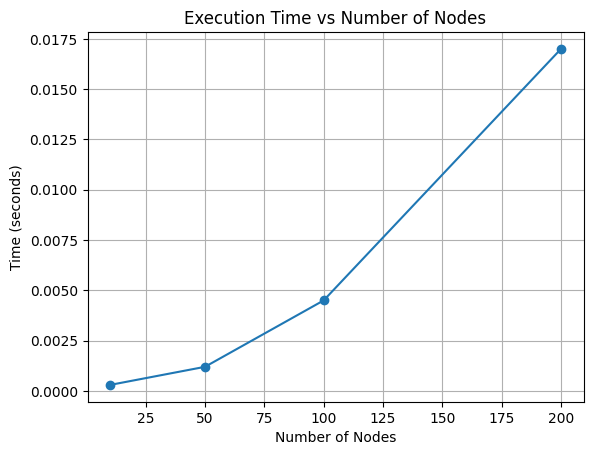

In [6]:
# Visualization:

nodes = [10, 50, 100, 200]
times = [0.0003, 0.0012, 0.0045, 0.017]  # Example timing data

plt.plot(nodes, times, marker='o')
plt.title("Execution Time vs Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()


### Summary Table

| Problem | Algorithm  | Time Complexity | Domain | Notes |
|----------|------------|----------------|---------|--------|
| Friend Suggestion | BFS | O(V + E) | Social Media | Finds mutual friend connections |
| Route Finding | Bellman-Ford | O(VE) | Navigation | Works with negative weights |
| Emergency Response | Dijkstra | O(E log V) | Disaster Management | Fastest route on positive weights |
| Cable Installation | Prim’s MST | O(E log V) | Infrastructure | Minimum total cable cost |

**Reflection:**  
Understanding the context of each real-world problem helps in choosing the right graph algorithm:
- BFS for exploring relationships (friend networks)
- Bellman-Ford for negative-weight navigation systems
- Dijkstra for fast routing with positive weights
- Prim’s for optimal infrastructure design.
